# Import

In [1]:
# Toy data 생성 및 시각화를 위한 라이브러리
import pandas as pd
import seaborn as sns
import torch
import random
import numpy as np
from torch.distributions.normal import Normal
import torch
from sklearn.preprocessing import MinMaxScaler
from torch import nn, optim  
from torch.utils.data import DataLoader, Dataset      # 데이터를 모델에 사용할 수 있게 정리해주는 라이브러리.
import torch.nn.functional as F  
import numpy as np
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import copy
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from random import randint   
from torch.utils.data import RandomSampler
from cdd import CDD

# DATA

In [18]:
import random
bn = 9
np.random.seed(seed=929)
# x_s = list(np.random.uniform(0,np.pi*2,100)) 
# x_t = list(np.random.uniform(0,np.pi/2,50)) + list(np.random.uniform(np.pi/2,2*np.pi,50))
#x_t_labeled = random.sample(list(np.random.uniform(0,np.pi/2,50)), bn//3) + random.sample(list(np.random.uniform(np.pi/2,2*np.pi,50)), bn//3) + random.sample(list(np.random.uniform(2*np.pi,6*np.pi,50)), bn//3) 
x_s = [i*np.pi*2/100 for i in range(101)] 
x_t = [i*np.pi/2/50 for i in range(50)]+[i*np.pi*3/2/50+np.pi/2 for i in range(51)]
#x_t_labeled = [np.pi/2/4,np.pi/4,np.pi/2/4*3,np.pi*7/8,np.pi*5/4,np.pi*13/8]
x_t_labeled = [np.pi/16,np.pi/2/4,np.pi/16*5,np.pi*15/32,np.pi*23/40,np.pi*30/40,np.pi*45/40,np.pi*13/8,np.pi*70/40]
y_s = list(np.sin(x_s)+np.random.normal(0, 0.05, 101))
y_s_true = list(np.sin(x_s))

y_t_true = []
for i in range(len(x_t)):
    if x_t[i]<np.pi/2:
        y_t_true.append(np.sin(2*np.array(x_t[i])))
    elif x_t[i]<np.pi*2:
        y_t_true.append(np.sin(2/3*(x_t[i]+np.pi)))
    else:
        y_t_true.append(np.sin(1/2*np.array(x_t[i]-2*np.pi)))
        
        
        
samples = np.random.normal(0, 0.05, 101).tolist()
y_t = []
for i in range(len(x_t)):
    if x_t[i]<np.pi/2:
        y_t.append(np.sin(2*np.array(x_t[i]))+samples[i])
    elif x_t[i]<np.pi*2:
        y_t.append(np.sin(2/3*(x_t[i]+np.pi))+samples[i])
    else:
        y_t.append(np.sin(1/2*np.array(x_t[i]-2*np.pi))+samples[i])

y_t_labeled = []
samples = np.random.normal(0, 0.05, bn).tolist()
for i in range(len(x_t_labeled)):
    if x_t_labeled[i]<np.pi/2:
        y_t_labeled.append(np.sin(2*np.array(x_t_labeled[i]))+samples[i])
    elif x_t_labeled[i]<np.pi*2:
        y_t_labeled.append(np.sin(2/3*(x_t_labeled[i]+np.pi))+samples[i])
    else:
        y_t_labeled.append(np.sin(1/2*np.array(x_t_labeled[i]-2*np.pi))+samples[i])
    

<Axes: xlabel='X', ylabel='Y'>

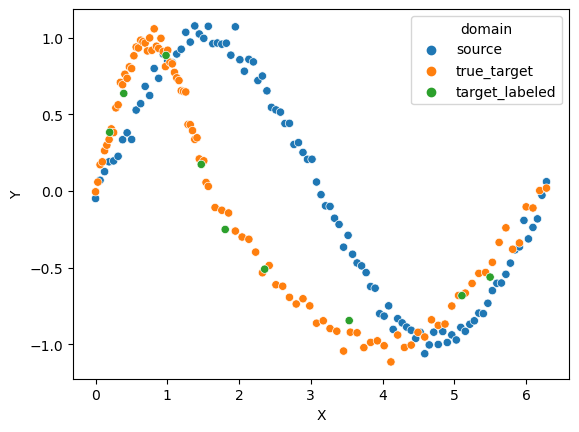

In [19]:
data_s = [[x_s[i],y_s[i],'source'] for i in range(len(x_s))]
df_s = pd.DataFrame(data_s, columns=['X','Y','domain'])


data_s_true = [[x_s[i],y_s_true[i],'source'] for i in range(len(x_s))]
df_s_true = pd.DataFrame(data_s_true, columns=['X','Y','domain'])
df_s_true = df_s_true.sort_values('X')

data_t = [[x_t[i],y_t[i],'true_target'] for i in range(len(x_t))]
df_t = pd.DataFrame(data_t, columns=['X','Y','domain'])

data_t_true = [[x_t[i],y_t_true[i],'true_target'] for i in range(len(x_t))]
df_t_true = pd.DataFrame(data_t_true, columns=['X','Y','domain'])

df_t_true = df_t_true.sort_values('X')
data_t_labeled = [[x_t_labeled[i],y_t_labeled[i],'target_labeled'] for i in range(len(x_t_labeled))]
df_t_labeled = pd.DataFrame(data_t_labeled, columns=['X','Y','domain'])

sns.scatterplot(data=pd.concat([df_s, df_t, df_t_labeled]), x= 'X', y='Y', hue='domain')

In [11]:
df_s.to_csv("df_s_9.csv",index=False)
df_t.to_csv("df_t_9.csv",index=False)
df_s_true.to_csv("df_s_true_9.csv",index=False)
df_t_true.to_csv("df_t_true_9.csv",index=False)
df_t_labeled.to_csv("df_t_labeled_9.csv",index=False)